<center><img src="img/aml-logo.png" width="600"/>

***

<center>Lecture 5</center>

***

<center>Linear models for Regression</center>

***

<center>4 March 2024<center>
<center>Rahman Peimankar<center>

# Agenda

* Handling of Missing Values
* Linear Models for Regression
    * Ordinary Least Squares
    * Bias and Variance
    * Ridge Regression
    * Lasso Regression
    * Understanding L1 and L2 Penalties
    * Elastic Net

# Recap of Last Week

<div>
<center>
<img src="img/image-3-lecture4.jpg" width="700"/>
</div>

<div>
<center>
<img src="img/image-4-lecture4.jpg" width="1200"/>
</div>

<div>
<center>
<img src="img/image-5-lecture4.jpg" width="1200"/>
</div>

<div>
<center>
<img src="img/image-9-lecture4.jpg" width="1200"/>
</div>

<div>
<center>
<img src="img/image-11-lecture4.jpg" width="1500"/>
</div>

# Dealing with missing values

* Missing values can be encoded in many ways
* Numpy has no standard format for it (often np.NaN) - pandas does
* Sometimes: 999, ???, ?, np.inf, “N/A”, “Unknown“ …
* Not discussing “missing output” - that’s semi-supervised learning.
* Often missingness is informative (Use MissingIndicator)

# Imputation Methods

* Mean / Median
* kNN
* Regression models / model-driven (later)

# Mean and Median

<div>
<center>
<img src="img/image-1.png" width="900"/>
</div>

In [80]:

import numpy as np
from sklearn.impute import SimpleImputer

X = np.array([[7, 2, 3], [4, np.nan, 6], [10, 5, 9]])

# Define a "SimpleImputer" and "fit" it to the dataset X above to impute the values using "mean" and "median" approaches.

# ### YOUR CODE HERE
imp_median = SimpleImputer(missing_values=np.nan, strategy='median', verbose=0)
imp_median.fit_transform(X)


array([[ 7. ,  2. ,  3. ],
       [ 4. ,  3.5,  6. ],
       [10. ,  5. ,  9. ]])

# KNN Imputation

* Find k nearest neighbors that have non-missing values.
* Fill in all missing values using the average of the neighbors.

<div>
<center>
<img src="img/image-2.jpg" width="900"/>
</div>

# Model-Driven Imputation

* Train regression model for missing values
* Iterate: retrain after filling in

# Comparision of Imputation Methods

<div>
<center>
<img src="img/image-3.jpg" width="1500"/>
</div>

Please implenet a kNN imputer with K=3 for the dummy data below using sklearn `KNNImputer` function:

In [1]:
import numpy as np
from sklearn.impute import KNNImputer
X = [[1, 2, np.nan], [3, 4, 3], [np.nan, 6, 5], [8, 8, 7]]

### YOUR CODE HERE


<font size="8"><center> Linear Models

# Linear Models for Regression

<div>
<center>
<table><tr>
<td><font size='8'><img src="img/quest/Qimage-1.jpg" width="300"/>
    <font size='8'><img src="img/quest/Qimage-2.jpg" width="300"/></td>
<td><font size='8'><img src="img/quest/Qimage-4.jpg" width="300"/>
    <font size='8'><img src="img/quest/Qimage-5.jpg" width="300"/></td>
</tr></table>

<div>
<center>
<font size='8'><img src="img/quest/Qimage-6.jpg" width="400"/>


<div>
<center>
<table><tr>
<td><font size='8'><img src="img/quest/Qimage-7.jpg" width="600"/></td>
<td><font size='8'><img src="img/quest/Qimage-8.jpg" width="600"/></td>
</tr></table>

<div>

<table><tr>
<td><font size='8'><img src="img/quest/Qimage-9.jpg" width="300"/></td>
<td><font size='8'><img src="img/quest/Qimage-10.jpg" width="300"/></td>
</tr></table>
    
$(b - y_1)^2 + (b - y_2)^2 + (b - y_3)^2 + (b - y_4)^2 + (b - y_5)^2 + (b - y_6)^2 + (b - y_7)^2 + (b - y_8)^2 + (b - y_9)^2 \approx 24$
    
 
* This is our measure of how well this line fits the data.
* It is called the "sum of squared residuals", because the residuals are the differences between the real data and the line, and we are summing the square of these values. 


<div>

<table><tr>
<td><img src="img/quest/Qimage-11.jpg" width="350"/>
    
 </td>
<td>
    
* The sum of squared residuals $\approx$ 18
* This is better than before</td>
</tr></table>


<div>

<table><tr>
<td><img src="img/quest/Qimage-12.jpg" width="350"/>
    
 </td>
<td>

* Does this fit improve if we rotate a little more?
* Yes! The sum of squared residuals $\approx$ 14
* This is even better than before</td>
</tr></table>


<div>
<center>
<table><tr>
<td><img src="img/quest/Qimage-13.jpg" width="350"/>
    
 </td>
<td>

* What if we rotate the line a whole lot?
* The fit gets worse. In this case the sum of squared residuals $\approx$ 31.</td>
</tr></table>


<div>
<center>
<table><tr>
<td><img src="img/quest/Qimage-14.jpg" width="350"/>
    
</td>
<td>

* The generic line equation is: $y = a*x + b$
***
* We want to find the optimal values for "a" and "b" so that we minimize the sum of squared residuals.
***
* In more general math terms ...
***
Sum of Squared Residulas $= ((a*x_1 + b) - y_1)^2 + ((a*x_2 + b) - y_2)^2 + \dots$

</tr></table>

Since we want the line that will give us the smallest sum of square, this method for finding the best values for "a" and "b" is called "Least Squares"

<div>
<center>
<img src="img/image-4.jpg" width="800"/>
</div>

<center>$\hat y = w^T \mathbf{x} + b = \sum_{i=1}^{p} w_i x_i + b$

# Ordinary Least Squares

<center>$\hat y = w^T \mathbf{x} + b = \sum_{i=1}^{p} w_i x_i + b$
***
<center>$\min_{\substack{w\in I\!R^{p}, b \in I\!R^{p}}} \sum_{i=1}^{n} || w^T \mathbf{x}_i + b - y_i ||^2$
***
Unique solution if $\mathbf{X} = (\mathbf{x_1}, \dots , \mathbf{x_n})^T$ has full column rank.

# Bias and Variance

<div>
<center>
<font size='8'><img src="img/quest/Qimage-15.jpg" width="750"/>


The first thing we do is split the data into two sets, one for training the machine learning algorithms and one for testing them.

<div>
<center>
<img src="img/quest/Qimage-16.jpg" width="700"/>


* The first machine learning algorithm that we will use is Linear Regression (Least Squares).
* Linear regression fits a **Straight Line** to the <font color = 'blue'>training set.
* <font color = 'black'>The **Straight Line** does not have the flexibility to accurately replicate the arc in the "true" relationship
* The **Straight Line** will never capture the true relationship between weight and height, no matter how well we fit it to the <font color = 'blue'>

* The inability for a machine learning method (like linear regression) to capture the true relationship is called <font color = 'red'> **bias**.

<div>
<center>
<font size='8'><img src="img/quest/Qimage-17.jpg" width="750"/>


* Another machine learning method might fir a **Squiggly Line** to the <font color = 'blue'>training set.
* <font color = 'black'> The **Squiggly Line** is super flexible and hugs the <font color = 'blue'>training set <font color = 'black'> along the arc of the true relationship. 
* The **Squiggly Line** has very little **bias**.

<div>
<center>
<font size='8'><img src="img/quest/Qimage-18.jpg" width="900"/>


* By calculating the sums of squares, we can see that the **Squiggly Line** fits the <font color = 'blue'>training set <font color = 'black'> much better than the **Straight Line**. 

We also have a <font color = 'green'>testing set.

<div>
<center>
<font size='8'><img src="img/quest/Qimage-19.jpg" width="600"/>


Now let's calculate the Sums of Squares for the <font color = 'green'>testing set.

<div>
<center>
<font size='8'><img src="img/quest/Qimage-20.jpg" width="600"/>


* By calculating the sums of squares, we can see that the **Straight Line** fits the <font color = 'green'>testing set <font color = 'black'> much better than the **Squiggly Line**.

* Even though **Squiggly Line** did a great job fitting the <font color = 'blue'>training set ...
* <font color = 'black'>It did a terrible job fitting the <font color = 'green'>testing set

<div>
<center>
<font size='8'><img src="img/quest/Qimage-21.jpg" width="900"/>


In Machine Learning lingo, the difference in fits between data sets is called **Variance**

# Conclusion

* The **Squiggly Line** has **low bias**, since it is flexible and can adapt to the curve in the relationship between weight and height...
* But the **Squiggly Line** has **high variability**, because it results in vastly different Sums of Squares for different datasets.    
    
* In contrast, the **Straight Line** has relatively **high bias**, since it can not capture the curve in the relationship between weight and height...
* But the **Straight Line** has relatively **low variance**, because the Sums of Squares are very similar for different datasets.

Because the **Squiggly Line** fits the <font color = 'blue'>training set <font color = 'black'>really well, but not the <font color = 'green'>testing set, <font color = 'black'> we say that the **Squiggly Line** is **overfit**.

<div>
<center>
<font size='8'><img src="img/quest/Qimage-22.jpg" width="500"/>

* In machine learning, the ideal algorithm has **low bias** and can accurately model the true relationship...
* And it has **low variability**, by producing consistent predictions across different datasets.

This is done by finding the sweet spot between a simple model and a complex model.


<div>
<center>
<table><tr>
<td><font size='8'><img src="img/quest/Qimage-23.jpg" width="500"/></td>
<td><font size='8'><img src="img/image-5.jpg" width="400"/></td>
</tr></table>

Three commonly used methods for finding the sweet spot between simple and complicated models are: **regularization**, **boosting** and **bagging**.

# Ridge Regression

* Look at a simple example that shows the main idea behind Ridge Regression...
* Go into details about how Ridge Regression works...
* Lastly, show how Ridge Regression works...

<div>
<center>
<font size='8'><img src="img/quest/Qimage-24.jpg" width="350"/>

But what if we only have two measurements?

<div>

<table><tr>
<td><img src="img/quest/Qimage-25.jpg" width="400"/></td>
<td>

* We fit a New Line with Least Square
* Since the New Line overlaps the two data points, the minimum sum of squared residuals = 0.
    
</td>
</tr></table>

<div>

<table><tr>
<td><img src="img/quest/Qimage-27.jpg" width="400"/></td>
<td>

* The sum of the squared residuals for just the <font color='red'>Two Red Points, <font color='black'>the <font color='red'> Training Data, <font color='black'>, is small (in this case it is 0)...
* But the sum of the squared residuals for the <font color='green'> Green Points, <font color='black'> the <font color='green'> Testing data, <font color='black'> is large...
* That means that the New Line has **High Variance**
    
</td>
</tr></table>

<div>
<table><tr>
<td><img src="img/quest/Qimage-28.jpg" width="400"/></td>
<td>

* The main idea behind <font color='blue'> Ridge Regression <font color='black'> is to find a <font color='blue'> New Line <font color='black'>that does not fit the <font color='red'> Training Data <font color='black'> as well...
* In other words, we introduce a small amount of **Bias** into the <font color='blue'> New Line <font color='black'> is fit to the data...
    
</td>
</tr></table>

<div>
<table><tr>
<td><img src="img/quest/Qimage-29.jpg" width="400"/></td>
<td>

* But in return for that small amount of **Bias**, we get a significant drop in **Variance**.
* In other words, by starting with a slightly worse fit, <font color='blue'> Ridge Regression <font color='black'> can provide better long term predictions.
    
</td>
</tr></table>

<div>
<table><tr>
<td><img src="img/quest/Qimage-30.jpg" width="400"/></td>
<td>

* <font color='blue'> Ridge Regression <font color='black'> determines values for the parameters in the equation below:<br>
    **Size** = y-axis intercept + slope * **Weight**<br>
    ... it minimizes ...<br>
    **the sum of the squared residuals** **+** <font color='red'>$\mathbf{\alpha}$ * **the slope$^2$**<b>
    
    
</td>
</tr></table>

* The <font color='red'> red part <font color='black'> of the equation adds a penalty to the traditional **Least Squares** method...
* And the $\alpha$ (alpha) determines how severe that penalty is.

## RUL dataset from Kaggle

Remaining useful life (RUL) is the amount of time that a machine/equipment can stay in operation before it is needed to perform any maintenenace/replacement. 

https://www.kaggle.com/datasets/ignaciovinuales/battery-remaining-useful-life-rul

<div>
<center>
<img src="img/image-15.JPG" width="1000"/>
</div>
    
    https://www.stratada.com/remaining-useful-life-rul-prediction/

In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df=pd.read_csv('Battery_RUL.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15064 entries, 0 to 15063
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cycle_Index                15064 non-null  float64
 1   Discharge Time (s)         15064 non-null  float64
 2   Decrement 3.6-3.4V (s)     15064 non-null  float64
 3   Max. Voltage Dischar. (V)  15064 non-null  float64
 4   Min. Voltage Charg. (V)    15064 non-null  float64
 5   Time at 4.15V (s)          15064 non-null  float64
 6   Time constant current (s)  15064 non-null  float64
 7   Charging time (s)          15064 non-null  float64
 8   RUL                        15064 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.0 MB


<AxesSubplot:>

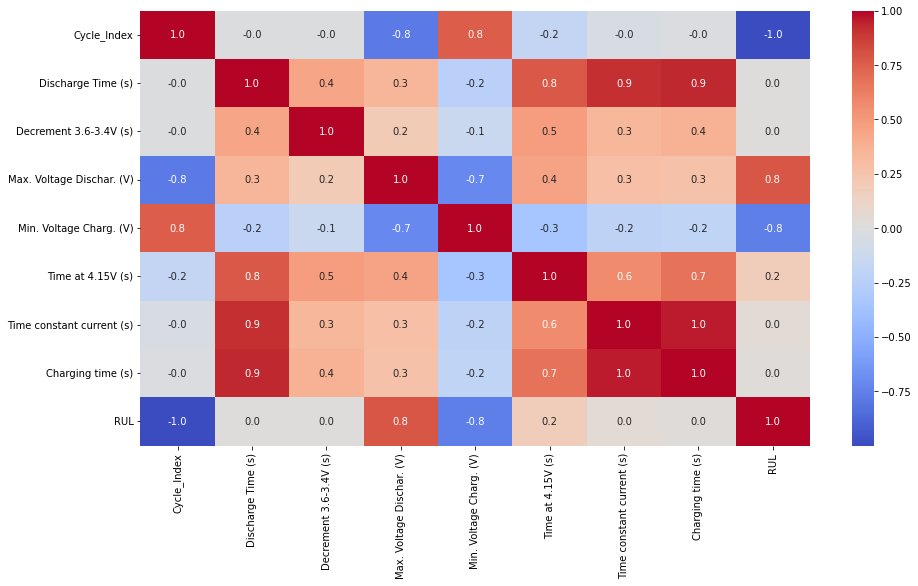

In [86]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(),annot=True, cbar=True, cmap='coolwarm', fmt='.1f')

In [24]:
df1 = df.drop(['Cycle_Index','Discharge Time (s)', 'Decrement 3.6-3.4V (s)', 
             'Time constant current (s)','Charging time (s)', 'RUL'], axis=1)

Apply a Linear Regression on the RUL Dataset. Evaluate your model performance using the sklearn `cross_val_score` function (10-fold cross validation) on both train and test sets.

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

X = df1.values
y = df["RUL"].values

x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=815)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### YOUR CODE HERE



# Ridge() Parameter Optimization

In [96]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso

param_grid = {'alpha': np.logspace(-3, 3, 13)}
np.set_printoptions(suppress=True, precision=3)
param_grid


{'alpha': array([   0.001,    0.003,    0.01 ,    0.032,    0.1  ,    0.316,
           1.   ,    3.162,   10.   ,   31.623,  100.   ,  316.228,
        1000.   ])}

In [97]:
grid = GridSearchCV(Lasso(), param_grid, cv=10, return_train_score=True)
grid.fit(x_train_scaled, y_train)
grid.best_score_
grid.best_params_


{'alpha': 1.0}

<AxesSubplot:xlabel='param_alpha'>

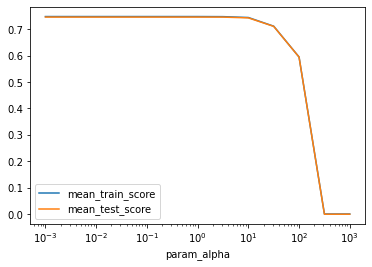

In [98]:
res = pd.DataFrame(grid.cv_results_)
ax = res.plot(x='param_alpha', y='mean_train_score', logx=True)
res.plot(x='param_alpha', y='mean_test_score', ax=ax)

# Lasso Regression

Lasso and Ridge Regression are **very similar** but there is a **very big difference**.

<div>
<table><tr>
<td><img src="img/quest/Qimage-30.jpg" width="400"/></td>
<td>

* If, instead of squaring the slope...<br>
    **Size** = y-axis intercept + slope * **Weight**<br>
    ... it minimizes ...<br>
    **the sum of the squared residuals** **+** $\mathbf{\alpha}$ * <font color='green'>|the slope| <strike> <font color='red'>**the slope$^2$**<strike> <br>
    
    
</td>
</tr></table>

Like **Ridge Regression, Lasso Regression** results in a line with a little bit of **Bias**.

<center>$\min_{\substack{w\in I\!R^{p}, b \in I\!R}} \sum_{i=1}^{n} ||w^T \mathbf{x}_i + b - y_i||^2 + \alpha ||w||_1$

# Elastic Net

* Combines benefits of Ridge and Lasso
* two parameters to tune.

<center>$\min_{\substack{w\in I\!R^{p}, b \in I\!R}} \sum_{i=1}^{n} ||w^T \mathbf{x}_i + b - y_i||^2 + \alpha_1 ||w||_1 + \alpha_2 ||w||_2^2$

# Parametrization in scikit-learn

<center>$\min_{\substack{w\in I\!R^{p}, b \in I\!R}} \sum_{i=1}^{n} ||w^T \mathbf{x}_i + b - y_i||^2 + \alpha \zeta ||w||_1 + \alpha (1 - \zeta) ||w||_2^2$

Where $\zeta$ is the relative amount of $l_1$ penalty ($l_1$_ratio in the code).

# Grid-searching ElasticNet

Please find the $\alpha$ and $\zeta$ parameters of ElasticNet using GridSearchCV method in sklearn. You will print out the best found parameters by GridSeacrhCV.

In [3]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
import numpy as np

diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### YOUR CODE HERE
param_grid = {'alpha': np.logspace(-3, 3, 13), 'l1_ratio': np.logspace(-5,0,13)}






predictions = grid.predict(X_test)

# Analyzing grid-search results

In [100]:
import pandas as pd
res = pd.pivot_table(pd.DataFrame(grid.cv_results_), values='mean_test_score', index='param_alpha', columns='param_l1_ratio')
res

param_l1_ratio,1.000e-05,2.610e-05,6.813e-05,1.778e-04,4.642e-04,1.212e-03,3.162e-03,8.254e-03,2.154e-02,5.623e-02,1.468e-01,3.831e-01,1.000e+00
param_alpha,,,,,,,,,,,,,
0.001,4.193e-01,4.193e-01,4.193e-01,4.193e-01,4.193e-01,4.193e-01,4.193e-01,4.195e-01,4.198e-01,0.421,0.422,0.426,0.425
0.003,3.622e-01,3.622e-01,3.622e-01,3.622e-01,3.622e-01,3.623e-01,3.625e-01,3.629e-01,3.639e-01,0.367,0.374,0.394,0.425
0.010,2.358e-01,2.358e-01,2.358e-01,2.358e-01,2.359e-01,2.359e-01,2.362e-01,2.369e-01,2.386e-01,0.243,0.256,0.295,0.426
0.032,9.131e-02,9.131e-02,9.131e-02,9.132e-02,9.135e-02,9.143e-02,9.164e-02,9.218e-02,9.361e-02,0.097,0.109,0.147,0.425
0.100,-9.063e-05,-8.985e-05,-8.780e-05,-8.245e-05,-6.848e-05,-3.200e-05,6.346e-05,3.142e-04,9.797e-04,0.003,0.008,0.028,0.427
0.316,-3.869e-02,-3.869e-02,-3.869e-02,-3.869e-02,-3.869e-02,-3.867e-02,-3.864e-02,-3.857e-02,-3.836e-02,-0.038,-0.036,-0.029,0.407
1.000,-5.222e-02,-5.222e-02,-5.222e-02,-5.221e-02,-5.221e-02,-5.221e-02,-5.221e-02,-5.220e-02,-5.217e-02,-0.052,-0.052,-0.051,0.286
3.162,-5.664e-02,-5.664e-02,-5.664e-02,-5.664e-02,-5.664e-02,-5.664e-02,-5.664e-02,-5.666e-02,-5.668e-02,-0.057,-0.057,-0.058,-0.059
10.000,-5.805e-02,-5.805e-02,-5.805e-02,-5.805e-02,-5.805e-02,-5.806e-02,-5.806e-02,-5.808e-02,-5.813e-02,-0.058,-0.059,-0.059,-0.059


<AxesSubplot:xlabel='param_l1_ratio'>

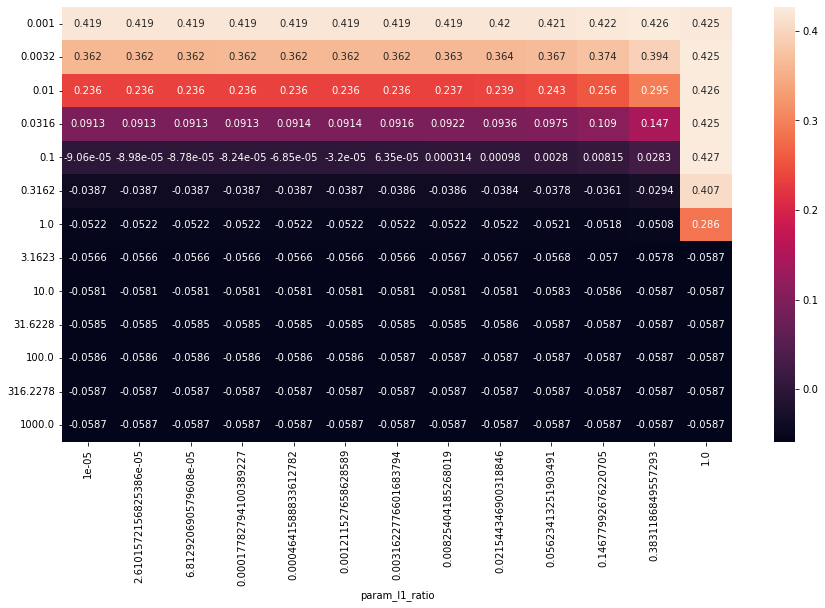

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.precision",3)
res = res.set_index(res.index.values.round(4))
plt.figure(figsize=(15,8))
sns.heatmap(res, annot=True, fmt=".3g")


<font size="25"><center>Thank you!